<a href="https://colab.research.google.com/github/Sornarajsankaran/admission_prediction/blob/master/cnn7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/cnn_file

/content/drive/MyDrive/cnn_file


In [ ]:
!unzip /content/drive/MyDrive/cnn_file/PistolData_merged.zip

Streaming output truncated to the last 5000 lines.
  inflating: PistolData_merged/pistol_images/328.jpg  
  inflating: __MACOSX/PistolData_merged/pistol_images/._328.jpg  
  inflating: PistolData_merged/pistol_images/1870.jpg  
  inflating: __MACOSX/PistolData_merged/pistol_images/._1870.jpg  
  inflating: PistolData_merged/pistol_images/472.jpg  
  inflating: __MACOSX/PistolData_merged/pistol_images/._472.jpg  
  inflating: PistolData_merged/pistol_images/1858.jpg  
  inflating: __MACOSX/PistolData_merged/pistol_images/._1858.jpg  
  inflating: PistolData_merged/pistol_images/1680.jpg  
  inflating: __MACOSX/PistolData_merged/pistol_images/._1680.jpg  
  inflating: PistolData_merged/pistol_images/314.jpg  
  inflating: __MACOSX/PistolData_merged/pistol_images/._314.jpg  
  inflating: PistolData_merged/pistol_images/2389.jpg  
  inflating: __MACOSX/PistolData_merged/pistol_images/._2389.jpg  
  inflating: PistolData_merged/pistol_images/3097.jpg  
  inflating: __MACOSX/PistolData_merge

In [ ]:
import os 
os.listdir('/content/drive/MyDrive/cnn_file/PistolData_merged')

['.DS_Store', 'pistol_annotations', 'pistol_images']

In [ ]:
annotations=sorted(os.listdir('/content/drive/MyDrive/cnn_file/PistolData_merged/pistol_annotations'))
images=sorted(os.listdir('/content/drive/MyDrive/cnn_file/PistolData_merged/pistol_images'))

In [ ]:
img_w,img_h=416,416

In [ ]:
def cv_coords(box):
  x,y,w,h= box[1],box[2],box[3],box[4]
  x1, y1 = int((x-w/2)*img_w), int((y-h/2)*img_h)
  x2, y2 = int((x+w/2)*img_w), int((y+h/2)*img_h)
  return x1, y1, x2, y2

In [ ]:
def bbox_finder(path):
  with open(path,'r') as f:
    return [float(i) for i in f.readlines()[0].split(" ")]

1.txt
10.txt
100.txt
1000.txt
1001.txt
1002.txt


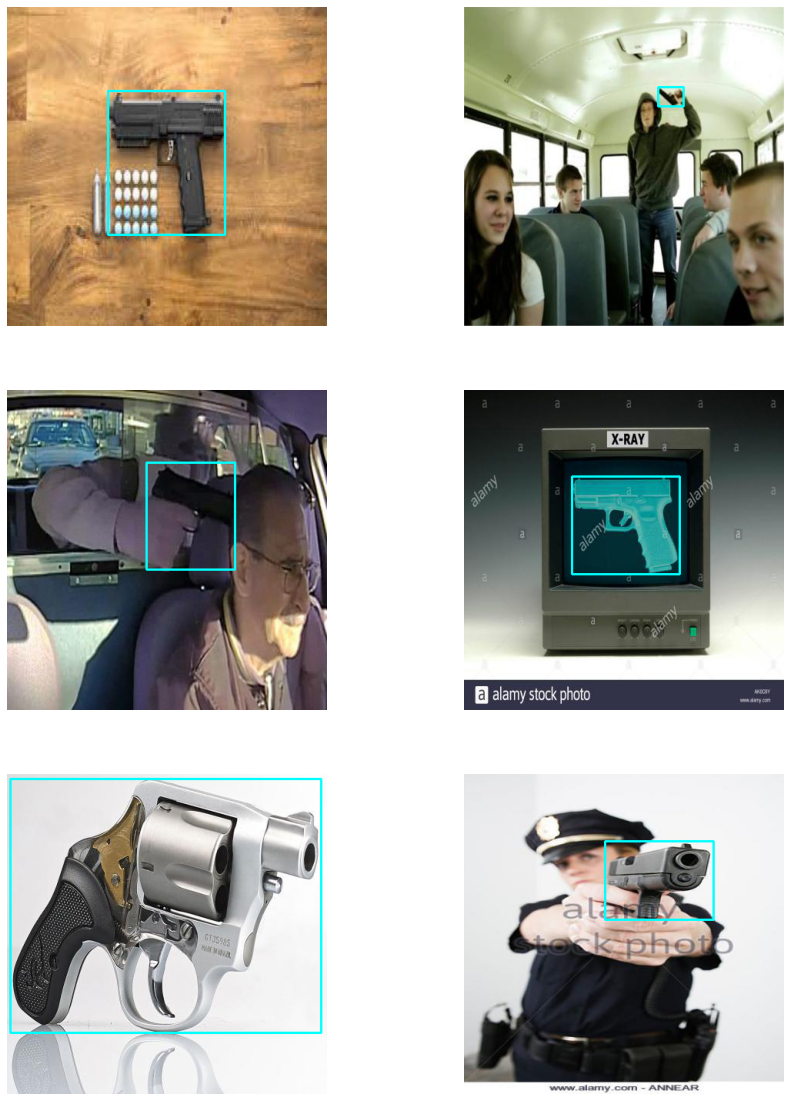

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2 as cv
plt.figure(figsize=(15,20))
for i in range(0,6):
  ax=plt.subplot(3,2,i+1)
  image=img.imread(f'/content/drive/MyDrive/cnn_file/PistolData_merged/pistol_images/{images[i+1]}')
  bbox=bbox_finder(f"/content/drive/MyDrive/cnn_file/PistolData_merged/pistol_annotations/{annotations[i+1]}")
  x1, y1, x2, y2=cv_coords(bbox)
  image=cv.rectangle(image,(x1,y1),(x2,y2),color=(0,255,255),thickness=2)

  plt.imshow(image)
  plt.axis("off")
  print(annotations[i])

In [ ]:
from tqdm.auto import tqdm
import numpy as np


images_,class_label,bboxes=[],[],[]
for i in tqdm(range(len(annotations))):
  image=plt.imread(f"/content/drive/MyDrive/cnn_file/PistolData_merged/pistol_images/{images[i]}")
  if image.shape==(416,416,3):
    images_.append(image)
  
  bbox_=bbox_finder(f"/content/drive/MyDrive/cnn_file/PistolData_merged/pistol_annotations/{annotations[i]}")
  clast6s_label.append(bbox_[0])
  bboxes.append(bbox_[1:])
images_,class_label,bboxes = np.array(images_),np.array(class_label),np.array(bboxes)
images_.shape, class_label.shape, bboxes.shape

  0%|          | 0/3703 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
images_


array([[[[  6,   6,   6],
         [  6,   6,   6],
         [  6,   6,   6],
         ...,
         [ 10,  10,  12],
         [ 10,  10,  12],
         [ 10,  10,  12]],

        [[  6,   6,   6],
         [  6,   6,   6],
         [  6,   6,   6],
         ...,
         [ 10,  10,  12],
         [ 10,  10,  12],
         [ 10,  10,  12]],

        [[  6,   6,   6],
         [  6,   6,   6],
         [  6,   6,   6],
         ...,
         [ 10,  10,  12],
         [ 10,  10,  12],
         [ 10,  10,  12]],

        ...,

        [[ 14,  12,  13],
         [ 13,  11,  12],
         [ 13,  11,  12],
         ...,
         [  7,   7,   9],
         [  7,   7,   9],
         [  7,   7,   9]],

        [[ 11,   9,  10],
         [ 12,  10,  11],
         [ 13,  11,  12],
         ...,
         [  7,   7,   9],
         [  7,   7,   9],
         [  7,   7,   9]],

        [[  8,   6,   7],
         [ 10,   8,   9],
         [ 13,  11,  12],
         ...,
         [  7,   7,   9],
        

In [ ]:
class_label

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
bboxes

array([[0.42538462, 0.24479737, 0.22153846, 0.28148959],
       [0.49839228, 0.49074074, 0.36655949, 0.45061728],
       [0.64666021, 0.28387097, 0.08131655, 0.05935484],
       ...,
       [0.66423077, 0.51078799, 0.45153846, 0.815197  ],
       [0.49666667, 0.49450549, 0.92666667, 0.79120879],
       [0.48653846, 0.45345188, 0.97153846, 0.90481172]])

In [ ]:
np.unique(class_label,return_counts=True)

(array([0., 1.]), array([ 999, 2704]))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train_label,y_test_label,y_train_bbox,y_test_bbox=train_test_split(images_,class_label,bboxes,test_size=0.3,random_state=100)
x_train.shape,x_test.shape,y_train_label.shape,y_test_label.shape,y_train_bbox.shape,y_test_bbox.shapeimport 

((2592, 416, 416, 3),
 (1111, 416, 416, 3),
 (2592,),
 (1111,),
 (2592, 4),
 (1111, 4))

In [ ]:
import tensorflow as tf

resnet_101=tf.keras.applications.ResNet101(weights="imagenet",include_top=False,input_shape=(416,416,3))

In [ ]:
from tensorflow.keras import layers
resnet_101.trainable=False

In [ ]:
resnet_output=resnet_101.output
gap_out=layers.GlobalAveragePooling2D()(resnet_output)

#Classification Head
x=layers.Dense(128,activation="relu")(gap_out)
x=layers.Dense(64,activation="relu")(x)
x=layers.Dense(32,activation="relu")(x)
class_output=layers.Dense(1,activation="sigmoid",name="class_output")(x)

#Regression Head
x1=layers.Dense(128,activation="relu")(gap_out)
x1=layers.Dense(64,activation="relu")(x1)
x1=layers.Dense(32,activation="relu")(x1)
box_output=layers.Dense(4,activation="sigmoid",name="box_output")(x1)


resNet_model=tf.keras.models.Model(resnet_101.input,[class_output,box_output])


In [ ]:
resNet_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 416, 416, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 422, 422, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 208, 208, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.8666 to fit



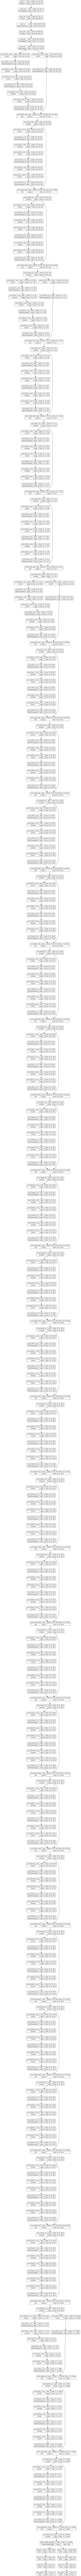

In [ ]:
tf.keras.utils.plot_model(resNet_model,show_shapes=True)

In [ ]:
losses={"class_output":"binary_crossentropy",
        "box_output":"mean_squared_error"}
metrics={"class_output":"accuracy","box_output":"mse"}
loss_weights={"class_output":4.0,"box_output":1.0}
opt = tf.keras.optimizers.Adam(learning_rate=1e-4) 
resNet_model.compile(optimizer=opt,loss=losses,metrics=metrics,loss_weights=loss_weights)

In [ ]:
log_dir = "pistol_Log" 

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [ ]:
history = resNet_model.fit(x=x_train, y={"class_output":y_train_label, "box_output":y_train_bbox},
                              validation_data=(x_test, {"class_output":y_test_label, "box_output":y_test_bbox}),
                              batch_size=32,
                              epochs=10,
                              callbacks=(tensorboard_callback)
                           ) 

Epoch 1/10
 4/81 [>.............................] - ETA: 55:09 - loss: 2.6414 - class_output_loss: 0.6354 - box_output_loss: 0.0999 - class_output_accuracy: 0.6328 - box_output_mse: 0.0999